# Exploratory Data Analysis - Laptops Pricing dataset

#### Explore different features that effect the price of laptops.

### Tasks

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("C:/Users/Yaswanth/Desktop/DSNB/DataSets/clean_laptops_df.csv", header=0, index_col=0)
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_Panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,14.000000,0.896552,8,256,3.74850,1891,Medium,0,1
234,Toshiba,3,2,1,5,13.299213,0.827586,8,256,2.64600,1950,Medium,1,0
235,Lenovo,4,2,1,5,12.000000,0.896552,8,256,2.99880,2236,Medium,0,1
236,Lenovo,3,3,1,5,15.598425,0.862069,6,256,5.29200,883,Low,1,0


# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the variables "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, printing the value of correlation of each feature with "Price".

<Axes: xlabel='CPU_frequency', ylabel='Price'>

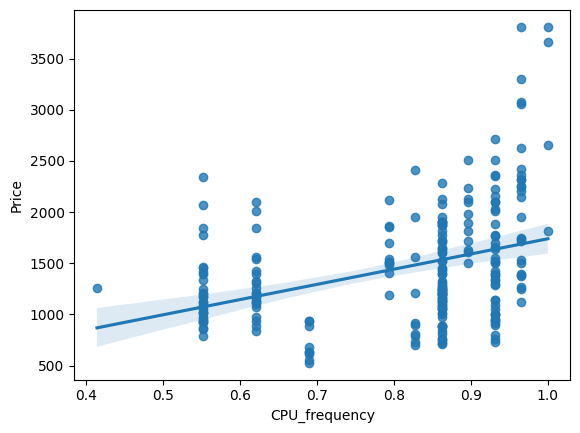

In [15]:
# CPU_frequency plot
sns.regplot(x = "CPU_frequency", y = "Price", data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

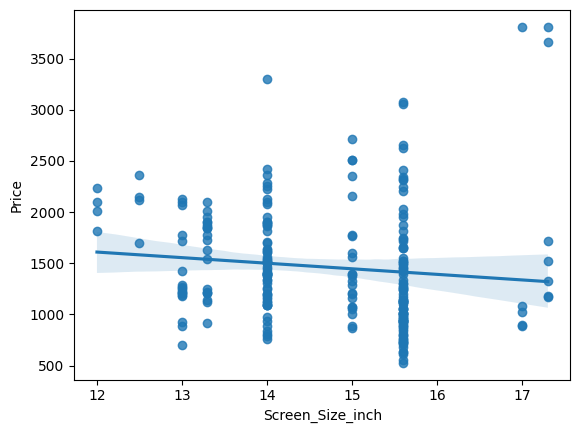

In [16]:
# Screen_Size_inch plot
sns.regplot(x = "Screen_Size_inch", y = "Price", data = df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

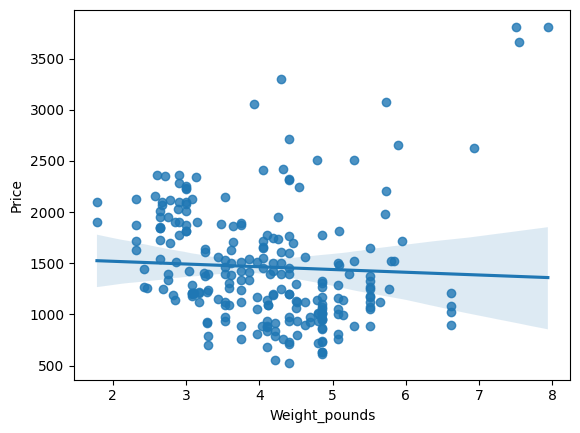

In [17]:
# Weight_pounds plot
sns.regplot(x="Weight_pounds", y="Price", data=df)

In [18]:
# Correlation values of the three variables with Price
df[["CPU_frequency", "Screen_Size_inch", "Weight_pounds", "Price"]].corr()

,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000955,0.066522,0.366666
Screen_Size_inch,-0.000955,1.000000,0.797605,-0.110565
Weight_pounds,0.066522,0.797605,1.000000,-0.050312
Price,0.366666,-0.110565,-0.050312,1.000000


### Categorical features
Generating Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD".

<Axes: xlabel='Category', ylabel='Price'>

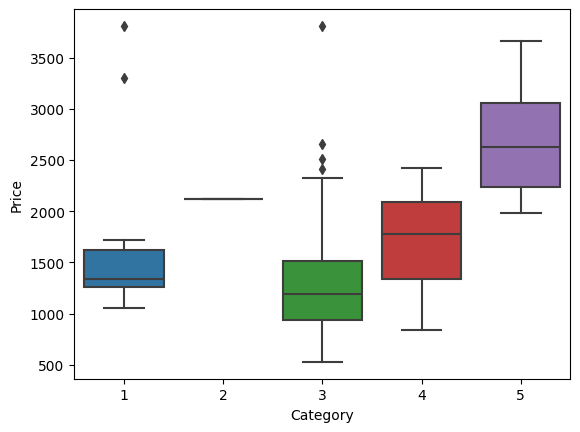

In [19]:
# Category Box plot
sns.boxplot(x="Category", y="Price", data = df)

<Axes: xlabel='GPU', ylabel='Price'>

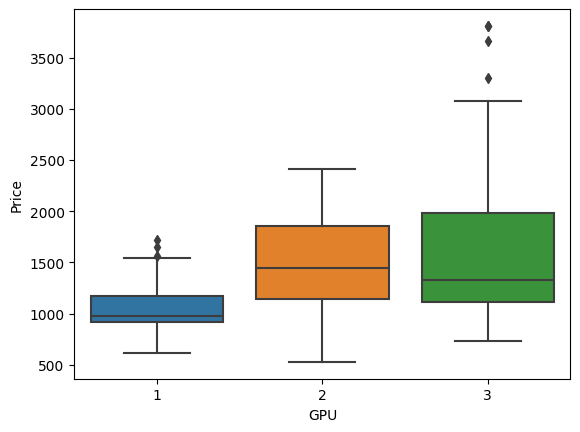

In [20]:
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df)

<Axes: xlabel='OS', ylabel='Price'>

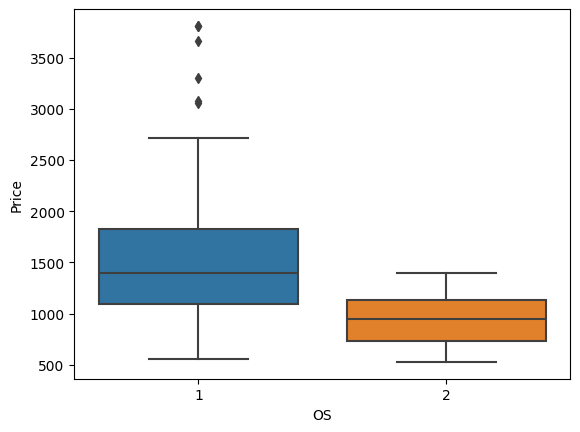

In [21]:
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

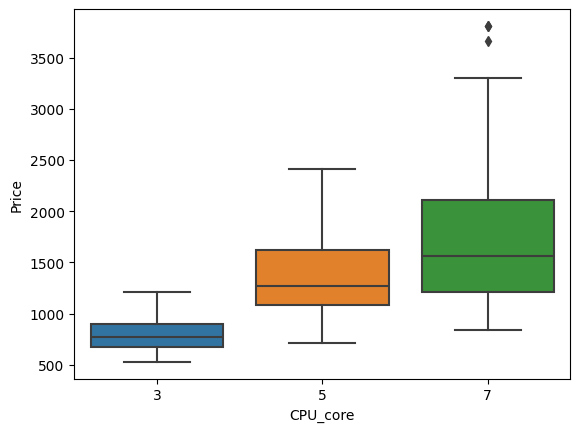

In [22]:
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

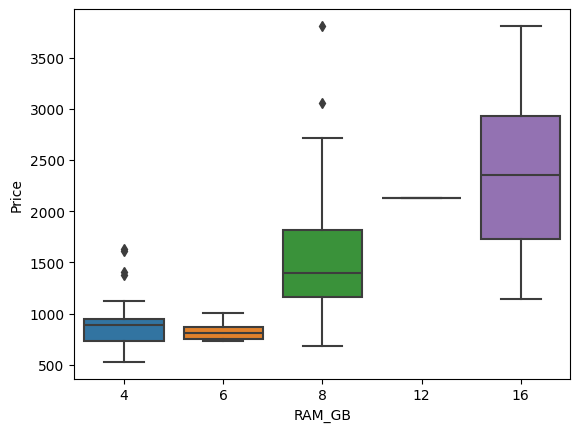

In [23]:
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

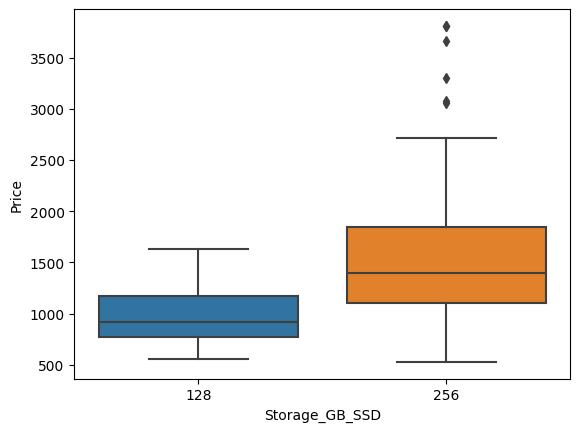

In [24]:
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)

# Task 2 - Descriptive Statistical Analysis

In [26]:
df.describe(include="all")

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_Panel
count,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,NaN,3.205882,2.151261,1.058824,5.630252,14.687951,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,NaN,0.776533,0.638282,0.235790,1.241787,1.165589,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,NaN,4.000000,3.000000,1.000000,7.000000,15.598425,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000
